[View in Colaboratory](https://colab.research.google.com/github/ShujuShi/hello-github/blob/master/imdb.ipynb)

In [1]:
import tensorflow as tf
from tensorflow import keras

imdb = keras.datasets.imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17473536/17464789 [==============================] - 1s 0us/step


In [2]:
print("training entries:{},labels: {}".format(len(train_data), len(train_labels)))

training entries:25000,labels: 25000


In [3]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [4]:
len(train_data[0]), len(train_data[1])

(218, 189)

In [6]:
word_index = imdb.get_word_index()
word_index

1654784/1641221 [==============================] - 0s 0us/step


{u'fawn': 34701,
 u'tsukino': 52006,
 u'nunnery': 52007,
 u'sonja': 16816,
 u'vani': 63951,
 u'woods': 1408,
 u'spiders': 16115,
 u'hanging': 2345,
 u'woody': 2289,
 u'trawling': 52008,
 u"hold's": 52009,
 u'comically': 11307,
 u'localized': 40830,
 u'disobeying': 30568,
 u"'royale": 52010,
 u"harpo's": 40831,
 u'canet': 52011,
 u'aileen': 19313,
 u'acurately': 52012,
 u"diplomat's": 52013,
 u'rickman': 25242,
 u'rumbustious': 52014,
 u'familiarness': 52015,
 u"spider'": 52016,
 u'hahahah': 68804,
 u"wood'": 52017,
 u'transvestism': 40833,
 u"hangin'": 34702,
 u'screaming': 1927,
 u'seamier': 40834,
 u'wooded': 34703,
 u'bravora': 52018,
 u'grueling': 16817,
 u'wooden': 1636,
 u'wednesday': 16818,
 u"'prix": 52019,
 u'altagracia': 34704,
 u'circuitry': 52020,
 u'crotch': 11585,
 u'busybody': 57766,
 u"tart'n'tangy": 52021,
 u'pantheistic': 52022,
 u'thrace': 52023,
 u"tom's": 11038,
 u'snuggles': 52025,
 u"frasier's": 52026,
 u'complainers': 52027,
 u'templarios': 52125,
 u'272': 40835

In [7]:
len(word_index)

88584

In [9]:
word_index={k:(v+3) for k,v in word_index.items()}
len(word_index)

88584

In [0]:
word_index["<PAD>"] = 0
word_index["<START>"] = 1
word_index["<UNK>"] = 2  # unknown
word_index["<UNUSED>"] = 3

In [13]:
word_index["<PAD>"]

0

In [14]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
len(reverse_word_index)

88588

In [15]:
reverse_word_index[4]

u'the'

In [0]:
def decode_review(text):
  return ' '.join([reverse_word_index.get(i,'?') for i in text])

In [19]:
decode_review(train_data[0])

u"<START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also <UNK> to the two little boy's that played the <UNK> of norman and paul they were just brilliant children are often left out of the <UNK> list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for w

In [0]:
train_data = keras.preprocessing.sequence.pad_sequences(train_data,
                                                         value=word_index["<PAD>"],
                                                         padding='post',
                                                         maxlen=256)
test_data = keras.preprocessing.sequence.pad_sequences(test_data,
                                                       value=word_index["<PAD>"],
                                                       padding='post',
                                                       maxlen=256)

In [22]:
len(train_data[0]), len(train_data[1])

(256, 256)

In [0]:
vocab_size=10000
model=keras.Sequential()
model.add(keras.layers.Embedding(vocab_size,16))
model.add(keras.layers.GlobalAveragePooling1D())
model.add(keras.layers.Dense(16, activation=tf.nn.relu))
model.add(keras.layers.Dense(1,activation=tf.nn.sigmoid))

In [24]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          160000    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 16)                272       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,289
Trainable params: 160,289
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=tf.train.AdamOptimizer(),
             loss='binary_crossentropy',
             metrics=['accuracy'])

In [0]:
x_val=train_data[:10000]
partial_x_train=train_data[10000:]
y_val=train_labels[:10000]
partial_y_train=train_labels[10000:]

In [27]:
history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs=40,
                   batch_size=512,
                   validation_data=(x_val, y_val),
                    verbose=1)

Train on 15000 samples, validate on 10000 samples
Epoch 1/40
15000/15000 [==============================] - 1s 70us/step - loss: 0.6951 - acc: 0.5120 - val_loss: 0.6922 - val_acc: 0.5201
Epoch 2/40
15000/15000 [==============================] - 1s 58us/step - loss: 0.6913 - acc: 0.5413 - val_loss: 0.6906 - val_acc: 0.5808
Epoch 3/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.6895 - acc: 0.5963 - val_loss: 0.6891 - val_acc: 0.5663
Epoch 4/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.6875 - acc: 0.6441 - val_loss: 0.6870 - val_acc: 0.5836
Epoch 5/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.6844 - acc: 0.6231 - val_loss: 0.6832 - val_acc: 0.6777
Epoch 6/40
15000/15000 [==============================] - 1s 60us/step - loss: 0.6799 - acc: 0.7029 - val_loss: 0.6782 - val_acc: 0.7199
Epoch 7/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.6731 - acc: 0.7345 - val_loss: 0.6712 - val_acc

Epoch 10/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.6312 - acc: 0.7819 - val_loss: 0.6268 - val_acc: 0.7678
Epoch 11/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.6087 - acc: 0.7775 - val_loss: 0.6061 - val_acc: 0.7588
Epoch 12/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.5826 - acc: 0.7919 - val_loss: 0.5793 - val_acc: 0.7826
Epoch 13/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.5535 - acc: 0.8065 - val_loss: 0.5537 - val_acc: 0.7927
Epoch 14/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.5244 - acc: 0.8164 - val_loss: 0.5271 - val_acc: 0.8027
Epoch 15/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.4954 - acc: 0.8264 - val_loss: 0.5010 - val_acc: 0.8124
Epoch 16/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.4681 - acc: 0.8358 - val_loss: 0.4772 - val_acc: 0.8216
Epoch 17/40
15000/15000 [=========

15000/15000 [==============================] - 1s 62us/step - loss: 0.3958 - acc: 0.8639 - val_loss: 0.4170 - val_acc: 0.8442
Epoch 20/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.3762 - acc: 0.8721 - val_loss: 0.4013 - val_acc: 0.8491
Epoch 21/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.3584 - acc: 0.8765 - val_loss: 0.3874 - val_acc: 0.8531
Epoch 22/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.3425 - acc: 0.8809 - val_loss: 0.3754 - val_acc: 0.8575
Epoch 23/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.3286 - acc: 0.8855 - val_loss: 0.3652 - val_acc: 0.8599
Epoch 24/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.3154 - acc: 0.8904 - val_loss: 0.3557 - val_acc: 0.8631
Epoch 25/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.3038 - acc: 0.8950 - val_loss: 0.3476 - val_acc: 0.8663
Epoch 26/40
15000/15000 [=====================

15000/15000 [==============================] - 1s 61us/step - loss: 0.2744 - acc: 0.9035 - val_loss: 0.3283 - val_acc: 0.8720
Epoch 29/40
15000/15000 [==============================] - 1s 64us/step - loss: 0.2660 - acc: 0.9069 - val_loss: 0.3236 - val_acc: 0.8732
Epoch 30/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.2588 - acc: 0.9069 - val_loss: 0.3191 - val_acc: 0.8741
Epoch 31/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.2509 - acc: 0.9121 - val_loss: 0.3153 - val_acc: 0.8761
Epoch 32/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.2446 - acc: 0.9149 - val_loss: 0.3118 - val_acc: 0.8767
Epoch 33/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.2375 - acc: 0.9163 - val_loss: 0.3088 - val_acc: 0.8769
Epoch 34/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.2314 - acc: 0.9187 - val_loss: 0.3060 - val_acc: 0.8775
Epoch 35/40
15000/15000 [=====================

15000/15000 [==============================] - 1s 61us/step - loss: 0.2146 - acc: 0.9241 - val_loss: 0.2995 - val_acc: 0.8791
Epoch 38/40
15000/15000 [==============================] - 1s 62us/step - loss: 0.2096 - acc: 0.9257 - val_loss: 0.2972 - val_acc: 0.8803
Epoch 39/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.2044 - acc: 0.9283 - val_loss: 0.2957 - val_acc: 0.8806
Epoch 40/40
15000/15000 [==============================] - 1s 61us/step - loss: 0.1996 - acc: 0.9297 - val_loss: 0.2941 - val_acc: 0.8819


In [28]:
results=model.evaluate(test_data,test_labels)
print(results)

25000/25000 [==============================] - 1s 31us/step
[0.30707242148399355, 0.874]


In [30]:
history_dict=history.history
history_dict['acc']

[0.5119999998569489,
 0.5413333335876465,
 0.5963333334287008,
 0.6440666665077209,
 0.6231333330790202,
 0.7029333334604899,
 0.7344666666348775,
 0.7550666664441427,
 0.7675333331743877,
 0.7818666663805643,
 0.7774666664759318,
 0.7919333332379659,
 0.8065333334604899,
 0.8163999999364218,
 0.8263999998092652,
 0.8358000000317891,
 0.8474666664123535,
 0.8576666666666667,
 0.8638666664441427,
 0.8720666664123535,
 0.8765333331425985,
 0.8809333331108093,
 0.885466666952769,
 0.8904000002543132,
 0.8949999998410543,
 0.8977999998410543,
 0.899533333269755,
 0.9035333331108093,
 0.9069333331743876,
 0.9069333335240682,
 0.9121333333651225,
 0.9148666668574015,
 0.91626666653951,
 0.9187333334604899,
 0.9205333335558573,
 0.9224666666030884,
 0.924133333269755,
 0.925733333047231,
 0.9282666668891907,
 0.929733333269755]

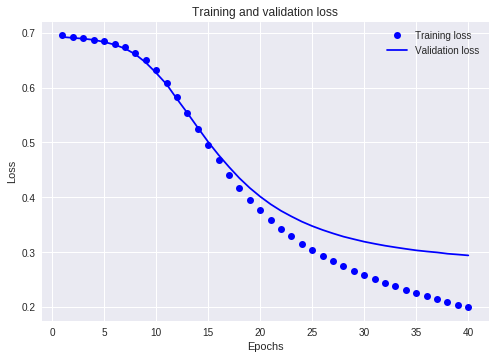

In [33]:
import matplotlib.pyplot as plt

acc=history.history['acc']
val_acc=history.history['val_acc']
loss =history.history['loss']
val_loss=history.history['val_loss']

epochs=range(1,len(acc)+1)
plt.plot(epochs, loss, 'bo',label='Training loss')
plt.plot(epochs, val_loss, 'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

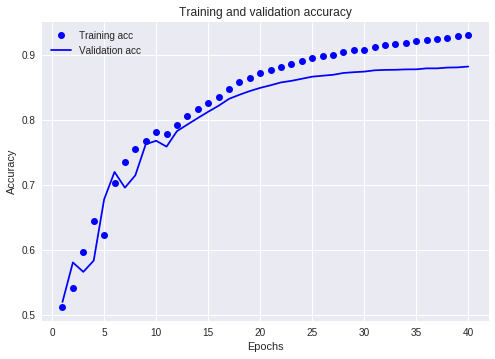

In [34]:
plt.plot(epochs,acc, 'bo',label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()